In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter

In [3]:
month_box_data = '../Month/Merge_Date.csv'
month_box = pd.read_csv(month_box_data, parse_dates=True)
month_box.head()

,Unnamed: 0,Movie,Box Office,Release Date_x,Award_date,Win or Nominated,Release Year,Release Month
0,0,Capote,28337516.0,2005-09-30,2006-03-05,W,2005.0,9.0
1,1,American Hustle,99165609.0,2013-12-12,2014-03-02,N,2013.0,12.0
2,2,Brokeback Mountain,82970165.0,2005-09-10,2006-03-05,W,2005.0,9.0
3,3,Walk the Line,119317827.0,2005-09-13,2006-03-05,W,2005.0,9.0
4,4,"Good Night, and Good Luck.",31500000.0,2005-09-16,2006-03-05,N,2005.0,9.0


In [4]:
#categorize ranges of days
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

month_box['Release Month'] = pd.cut(month_box['Release Month'], bins=bins, labels=labels)
month_box.head()

,Unnamed: 0,Movie,Box Office,Release Date_x,Award_date,Win or Nominated,Release Year,Release Month
0,0,Capote,28337516.0,2005-09-30,2006-03-05,W,2005.0,Sep
1,1,American Hustle,99165609.0,2013-12-12,2014-03-02,N,2013.0,Dec
2,2,Brokeback Mountain,82970165.0,2005-09-10,2006-03-05,W,2005.0,Sep
3,3,Walk the Line,119317827.0,2005-09-13,2006-03-05,W,2005.0,Sep
4,4,"Good Night, and Good Luck.",31500000.0,2005-09-16,2006-03-05,N,2005.0,Sep


In [5]:
winner = month_box[month_box["Win or Nominated"] == "W"]
April_df = winner[winner['Release Month'] == 'Apr'] 
#Taxi to the Dark Side : Worldwide:$294,309, less than 1 million, no show
#Music by Prudence is short documentary, no Box office
winner_count = winner.groupby(["Release Month"]).count()["Win or Nominated"]
winner_box_sum = winner.groupby('Release Month')["Box Office"].sum().reset_index()
winner_box_sum['Box Office'] = winner_box_sum['Box Office'] / 1000000  #cover to Million
April_df

,Unnamed: 0,Movie,Box Office,Release Date_x,Award_date,Win or Nominated,Release Year,Release Month
205,253,Taxi to the Dark Side,0.0,2007-04-30,2008-02-24,W,2007.0,Apr
257,317,Music by Prudence,0.0,2010-04-01,2011-02-27,W,2010.0,Apr


In [6]:
winner_box_mean = winner.groupby('Release Month')["Box Office"].mean().reset_index()
winner_box_mean['Box Office'] = winner_box_mean['Box Office'] / 1000000  #cover to Million
winner_box_mean

,Release Month,Box Office
0,Jan,6.105753
1,Feb,39.625670
2,Mar,113.493071
3,Apr,0.000000
4,May,121.441022
5,Jun,117.262879
6,July,100.387470
7,Aug,89.706071
8,Sep,55.661957
9,Oct,53.864344


In [7]:
nominate = month_box[month_box["Win or Nominated"] == "N"]
nominate_count = nominate.groupby(["Release Month"]).count()["Win or Nominated"]
nominate_box_sum = nominate.groupby('Release Month')["Box Office"].sum().reset_index()
nominate_box_sum['Box Office'] = nominate_box_sum['Box Office'] / 1000000  #cover to Million
nominate_count

Release Month
Jan     21
Feb     14
Mar     13
Apr     15
May     21
Jun     27
July    14
Aug     18
Sep     48
Oct     39
Nov     28
Dec     43
Name: Win or Nominated, dtype: int64

In [8]:
nominate_box_mean = nominate.groupby('Release Month')["Box Office"].mean().reset_index()
nominate_box_mean['Box Office'] = nominate_box_mean['Box Office'] / 1000000  #cover to Million
nominate_box_mean

,Release Month,Box Office
0,Jan,7.733621
1,Feb,14.419626
2,Mar,68.811342
3,Apr,113.974892
4,May,70.330679
5,Jun,126.301013
6,July,110.172893
7,Aug,37.757970
8,Sep,23.629141
9,Oct,26.299758


<IPython.core.display.Javascript object>


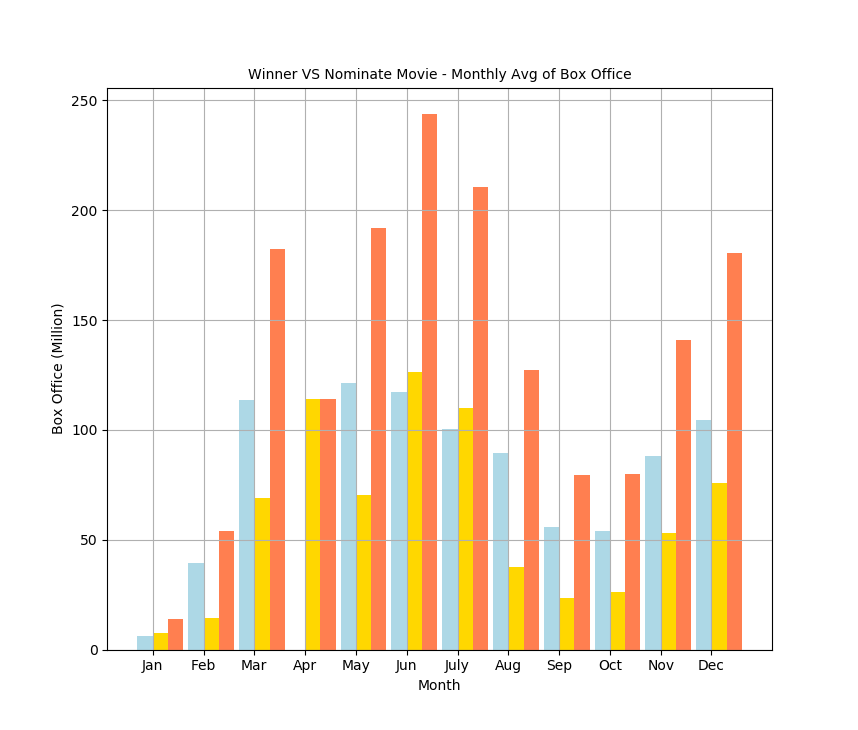

([<matplotlib.axis.XTick at 0x11eaed8d0>,
 <a list of 12 Text xticklabel objects>)

In [9]:
N = 12
avg_winner_value = winner_box_mean['Box Office']
avg_nominate_value = nominate_box_mean['Box Office']
avg_total_value = avg_winner_value + avg_nominate_value
ind = np.arange(N) 
width = 0.3 
w_a = plt.bar(ind, avg_winner_value, width, label='Winner', color='lightblue')
n_a = plt.bar(ind + width, avg_nominate_value, width, label='Nominate', color='gold')
total_a = plt.bar(ind + width*2, avg_total_value, width, label='Nominate', color='coral')
plt.xticks(ind + width / 2, ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))


In [13]:
plt.grid()
plt.title('Winner VS Nominate Movie - Monthly Avg of Box Office', fontsize=10)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Box Office (Million)', fontsize=10)
plt.show()

In [14]:
# Save Figure
plt.savefig("../Month/avg_WN_boxMonth.png")